## DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [4]:
Claims = pd.read_csv("D:\BA\Python\Basic Exercises\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
Cust_demo = pd.read_csv("D:\BA\Python\Basic Exercises\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
Cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
Cust_claims = pd.merge(left = Claims, right = Cust_demo, left_on='customer_id', right_on='CUST_ID', how='inner')
Cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [8]:
Cust_claims["DateOfBirth"] = pd.to_datetime(Cust_claims.DateOfBirth, format = "%d-%b-%y")
Cust_claims.loc[(Cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"] = Cust_claims[Cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
Cust_claims["claim_date"] = pd.to_datetime(Cust_claims.claim_date, format = "%m/%d/%Y")
Cust_claims["Contact"] = pd.to_numeric(Cust_claims.Contact.str.replace("-",""))
Cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,21868593,Female,1979-01-12,VT,7899168172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,1970-01-13,ME,2655431264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7986314758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,30308357,Female,1984-03-11,TN,7986314758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,47830476,Female,1986-05-01,MA,4131877945,Silver


#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [6]:
Cust_claims["claim_amount"] = pd.to_numeric(Cust_claims['claim_amount'].str.replace("$",""),downcast='float')
Cust_claims.head()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_17636\587890218.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Cust_claims["claim_amount"] = pd.to_numeric(Cust_claims['claim_amount'].str.replace("$",""),downcast='float')


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2.655431e+09,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,7.986315e+09,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver


#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [7]:
Cust_claims['flag'] = np.where((Cust_claims.police_report == 'Unknown') | (Cust_claims.police_report == 'Yes'),1,0)
Cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,0


In [8]:
Cust_claims.loc[::,['police_report','flag']]

,police_report,flag
0,No,0
1,Unknown,1
2,No,0
3,No,0
4,No,0
...,...,...
1080,Yes,1
1081,No,0
1082,Yes,1
1083,No,0


#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [9]:
Cust_claims = Cust_claims.groupby('customer_id').first().reset_index(drop = True)
Cust_claims.head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,0
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,263204,Male,1972-12-20,TX,1.738926e+09,Silver,0
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,287476,Male,1988-07-28,FL,3.645982e+09,Silver,1
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,441097,Male,1971-08-19,CA,1.873488e+09,Gold,1
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,524545,Female,1980-08-10,NC,7.988625e+09,Gold,0


#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [10]:
Cust_claims.isnull().sum()

claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
flag                    0
dtype: int64

In [11]:
Cust_claims["claim_amount"]= Cust_claims['claim_amount'].replace(np.NaN,Cust_claims['claim_amount'].mean())
Cust_claims["claim_amount"].isna().sum()

0

In [12]:
Cust_claims["total_policy_claims"]= Cust_claims['total_policy_claims'].fillna(Cust_claims['total_policy_claims'].mode()[0])
Cust_claims["total_policy_claims"].isna().sum()

0

In [13]:
Cust_claims.isnull().sum()

claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
flag                   0
dtype: int64

#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [14]:
Cust_claims["Age"] = ((Cust_claims.claim_date - Cust_claims.DateOfBirth).apply(lambda x: x.days)/365)
Cust_claims.head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,Age
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498047,1.0,Yes,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,0,39.909589
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,Male,1972-12-20,TX,1.738926e+09,Silver,0,45.317808
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,Male,1988-07-28,FL,3.645982e+09,Silver,1,29.241096
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,441097,Male,1971-08-19,CA,1.873488e+09,Gold,1,46.619178
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,524545,Female,1980-08-10,NC,7.988625e+09,Gold,0,37.986301


In [15]:
Cust_claims.loc[(Cust_claims.Age < 18),'AgeGroup'] = 'Children'
Cust_claims.loc[(Cust_claims.Age >=18) & (Cust_claims.Age <30),'AgeGroup'] = 'Youth'
Cust_claims.loc[(Cust_claims.Age >=30) & (Cust_claims.Age <60),'AgeGroup'] = 'Adult'
Cust_claims.loc[(Cust_claims.Age >=60),'AgeGroup'] = 'Senior'

In [16]:
Cust_claims.head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,Age,AgeGroup
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498047,1.0,Yes,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,0,39.909589,Adult
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,Male,1972-12-20,TX,1.738926e+09,Silver,0,45.317808,Adult
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,Male,1988-07-28,FL,3.645982e+09,Silver,1,29.241096,Youth
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,441097,Male,1971-08-19,CA,1.873488e+09,Gold,1,46.619178,Adult
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,524545,Female,1980-08-10,NC,7.988625e+09,Gold,0,37.986301,Adult


In [17]:
Cust_claims.groupby(["AgeGroup"])["Age"].count()

AgeGroup
Adult       744
Children      7
Youth       327
Name: Age, dtype: int64

#### 8. What is the average amount claimed by the customers from various segments?

In [18]:
Avg_amt_claimed = Cust_claims.groupby(["Segment"])["claim_amount"].mean()
Avg_amt_claimed

Segment
Gold        12756.479492
Platinum    12369.304688
Silver      12269.434570
Name: claim_amount, dtype: float32

#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [19]:
Inc_Amt = Cust_claims.loc[Cust_claims.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("Total ")
Inc_Amt

incident_cause
Total Crime                  724462.5
Total Driver error          3264286.0
Total Natural causes        1312706.0
Total Other causes          3725038.5
Total Other driver error    3318806.5
Name: claim_amount, dtype: float32

#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [20]:
Adults_claims_count= Cust_claims.loc[(Cust_claims.incident_cause.str.lower().str.contains("driver") & (Cust_claims.State== "TX") | (Cust_claims.State== "DE") | (Cust_claims.State== "AK")) ].groupby(["State"])["claim_amount"].count()
Adults_claims_count

State
AK    19
DE    29
TX    10
Name: claim_amount, dtype: int64

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [21]:
Gen_Seg_claims = Cust_claims.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
Gen_Seg_claims.head()

,gender,Segment,claim_amount
0,Female,Gold,2109763.5
1,Female,Platinum,2369503.5
2,Female,Silver,1898558.5
3,Male,Gold,2622890.5
4,Male,Platinum,2095815.5


In [22]:
Gen_seg_claims1 = pd.pivot(Gen_Seg_claims, index = "Segment", columns = "gender", values = "claim_amount")
Gen_seg_claims1

gender,Female,Male
Segment,,
Gold,2109763.5,2622890.5
Platinum,2369503.5,2095815.5
Silver,1898558.5,2346666.0


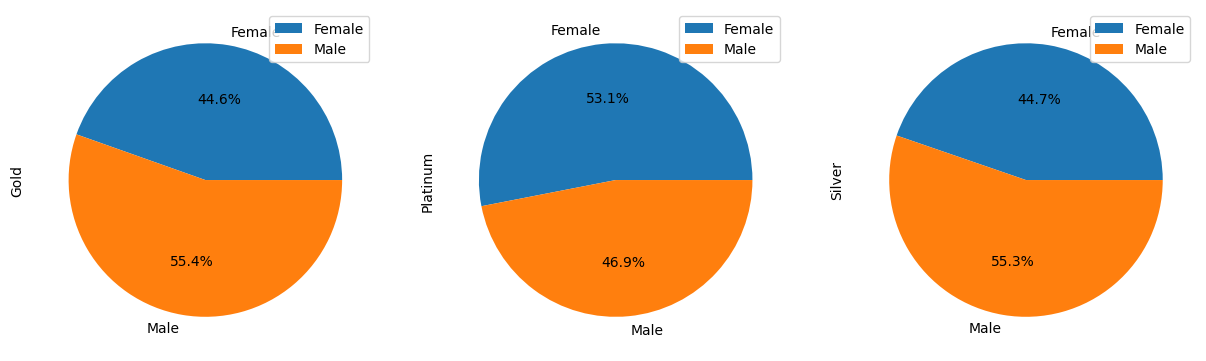

In [23]:
Gen_seg_claims1.T.plot(kind = 'pie', subplots = True, legend = True, figsize = (15,7), autopct = '%1.1f%%')
plt.show() 

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [24]:
Gender_driver= Cust_claims.loc[(Cust_claims.incident_cause.str.lower().str.contains("driver"))].groupby(["gender"])[["gender"]].count().add_prefix("Count of ")
Gender_driver

,Count of gender
gender,
Female,221
Male,280


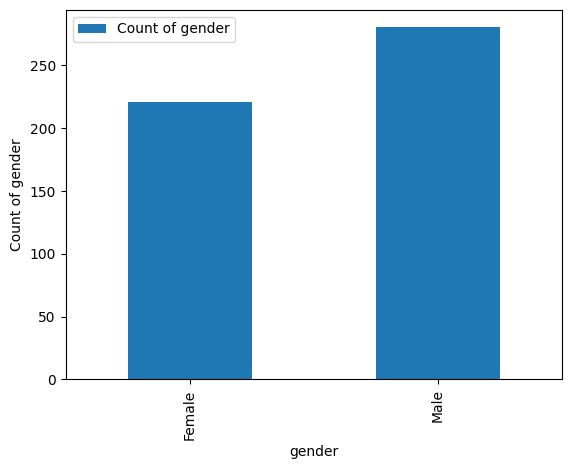

In [25]:
Gender_driver.plot(kind = 'bar')
plt.xlabel("gender")
plt.ylabel("Count of gender")
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [32]:
Cust_claims["Frauds"]= np.where(Cust_claims.fraudulent == "Yes",1,0)
Cust_claims.head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,Age,AgeGroup,Frauds
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498047,1.0,Yes,154557,Female,1978-05-23,DE,9.628791e+09,Platinum,0,39.909589,Adult,1
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,Male,1972-12-20,TX,1.738926e+09,Silver,0,45.317808,Adult,1
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,Male,1988-07-28,FL,3.645982e+09,Silver,1,29.241096,Youth,1
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,441097,Male,1971-08-19,CA,1.873488e+09,Gold,1,46.619178,Adult,0
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,524545,Female,1980-08-10,NC,7.988625e+09,Gold,0,37.986301,Adult,0


In [40]:
Cust_Frd = Cust_claims.groupby(['AgeGroup'])['Frauds'].count()
Cust_Frd

AgeGroup
Adult       744
Children      7
Youth       327
Name: Frauds, dtype: int64

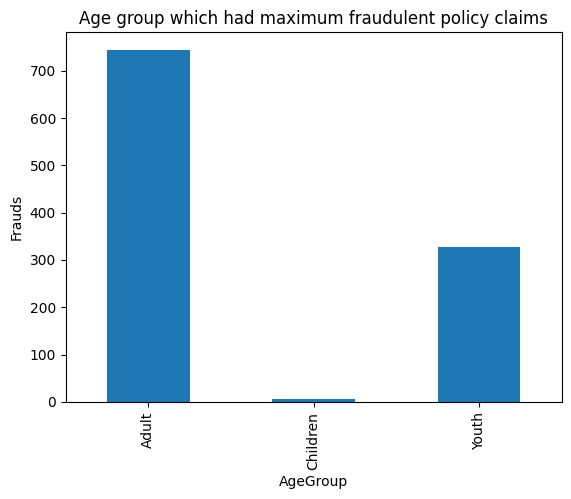

In [42]:
Cust_Frd.plot(kind = 'bar')
plt.ylabel('Frauds')
plt.title('Age group which had maximum fraudulent policy claims')
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [51]:
Cust_claims['Month'] = pd.to_datetime(Cust_claims['claim_date'])
Cust_claims['Month'] = Cust_claims['Month'].dt.month
Cust_claims.head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,...,State,Contact,Segment,flag,Age,AgeGroup,Frauds,claim_month,Claim_month,Month
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498047,1.0,Yes,154557,...,DE,9.628791e+09,Platinum,0,39.909589,Adult,1,2018-04-10,4,4
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,...,TX,1.738926e+09,Silver,0,45.317808,Adult,1,2018-04-04,4,4
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,...,FL,3.645982e+09,Silver,1,29.241096,Youth,1,2017-10-17,10,10
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,441097,...,CA,1.873488e+09,Gold,1,46.619178,Adult,0,2018-03-21,3,3
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,524545,...,NC,7.988625e+09,Gold,0,37.986301,Adult,0,2018-07-27,7,7


In [55]:
Cust_claims.drop(columns = 'Claim_month')

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,...,DateOfBirth,State,Contact,Segment,flag,Age,AgeGroup,Frauds,claim_month,Month
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498047,1.0,Yes,154557,...,1978-05-23,DE,9.628791e+09,Platinum,0,39.909589,Adult,1,2018-04-10,4
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,...,1972-12-20,TX,1.738926e+09,Silver,0,45.317808,Adult,1,2018-04-04,4
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,...,1988-07-28,FL,3.645982e+09,Silver,1,29.241096,Youth,1,2017-10-17,10
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,441097,...,1971-08-19,CA,1.873488e+09,Gold,1,46.619178,Adult,0,2018-03-21,3
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,524545,...,1980-08-10,NC,7.988625e+09,Gold,0,37.986301,Adult,0,2018-07-27,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,99674324,...,1965-01-28,UT,5.175625e+09,Silver,0,53.473973,Adult,0,2018-07-07,7
1074,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,99723844,...,1966-06-19,HI,4.577521e+09,Gold,1,51.586301,Adult,0,2018-01-06,1
1075,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,99761663,...,1963-11-18,NC,6.432465e+09,Silver,0,54.413699,Adult,1,2018-04-04,4
1076,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,99892000,...,1995-06-08,OR,3.952466e+09,Gold,0,22.449315,Youth,1,2017-11-13,11


In [82]:
Cust_month_amount = Cust_claims.groupby(['Month'])['claim_amount'].sum().reset_index()
Cust_month_amount

,Month,claim_amount
0,1,1332012.0
1,2,1133107.0
2,3,1320094.0
3,4,1276071.5
4,5,1114211.5
5,6,1276333.0
6,7,1379035.0
7,8,911203.5
8,9,980648.0
9,10,1422655.5


<AxesSubplot: xlabel='Month', ylabel='claim_amount'>

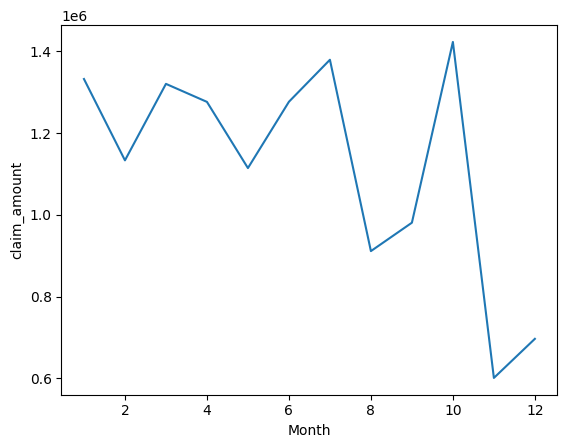

In [106]:
sns.lineplot(Cust_month_amount, x = 'Month', y = 'claim_amount')

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

#### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [58]:
Frauds_amount_gender= pd.DataFrame(Cust_claims.loc[(Cust_claims.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Frauds_amount_gender

Fraud_claim_amount
gender AgeGroup                    
Female Adult           12462.083008
       Youth            7599.125000
Male   Adult           17062.199219
       Children        32407.000000
       Youth           10096.432617

In [59]:
Non_Frauds_amount_gender=pd.DataFrame(Cust_claims.loc[(Cust_claims.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))
Non_Frauds_amount_gender

Non_Fraud_claim_amount
gender AgeGroup                        
Female Adult               12494.322266
       Children            11210.000000
       Youth               12300.639648
Male   Adult               12091.993164
       Children            22615.000000
       Youth               12104.675781

In [61]:
Claims_age_gender = pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","AgeGroup"])
Claims_age_gender

Fraud_claim_amount  Non_Fraud_claim_amount
gender AgeGroup                                            
Female Adult           12462.083008            12494.322266
       Youth            7599.125000            12300.639648
Male   Adult           17062.199219            12091.993164
       Children        32407.000000            22615.000000
       Youth           10096.432617            12104.675781

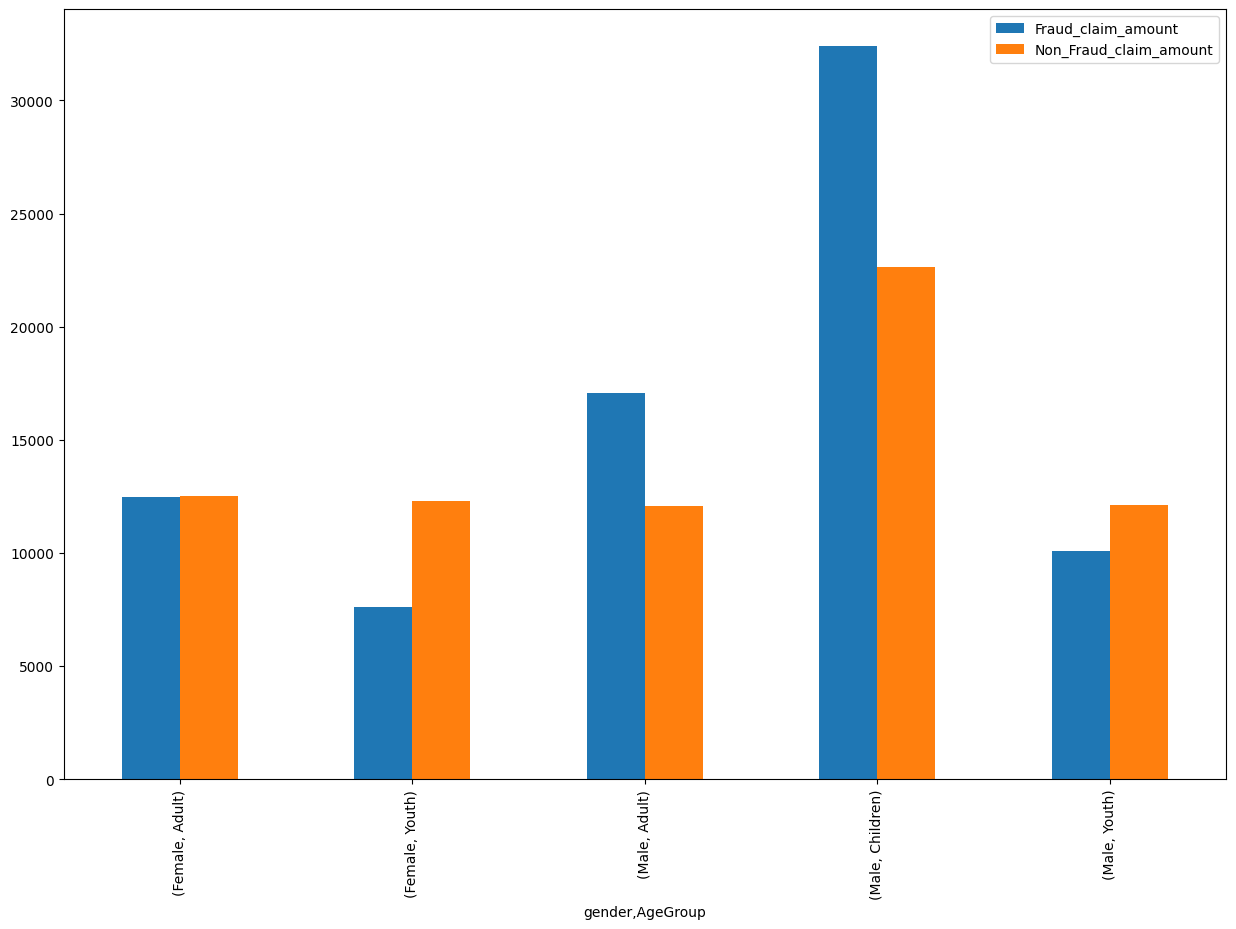

In [68]:
Claims_age_gender.plot(kind="bar", legend= True,figsize=(15,10))
plt.show()

#### 16. Is there any similarity in the amount claimed by males and females?

In [122]:
Cust_claims_Gender =  Cust_claims.groupby(["gender", "claim_date"])[["claim_amount"]].sum().reset_index()
Cust_claims_Gender.head()

,gender,claim_date,claim_amount
0,Female,2017-01-01,119620.000000
1,Female,2017-01-07,4576.500000
2,Female,2017-01-14,85203.000000
3,Female,2017-01-21,23379.498047
4,Female,2017-01-27,6507.500000


In [126]:
Cust_claims_Gender['Month'] = Cust_claims_Gender['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
Cust_claims_Gender['Year'] = Cust_claims_Gender['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
Cust_claims_Gender.head()

,gender,claim_date,claim_amount,Month,Year
0,Female,2017-01-01,119620.000000,January,2017
1,Female,2017-01-07,4576.500000,January,2017
2,Female,2017-01-14,85203.000000,January,2017
3,Female,2017-01-21,23379.498047,January,2017
4,Female,2017-01-27,6507.500000,January,2017


In [133]:
Spend_male = Cust_claims_Gender.loc[Cust_claims_Gender['gender'] == 'Female', 'claim_amount'].mean()
Spend_male

63778.254

In [132]:
Spend_female = Cust_claims_Gender.loc[Cust_claims_Gender['gender'] == 'Male', 'claim_amount'].mean()
Spend_female

71367.39

In [140]:
eq_var = stats.ttest_ind(a= Spend_male, b= Spend_female, equal_var=True)
eq_var.statistic

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_17636\3109576961.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  eq_var = stats.ttest_ind(a= Spend_male, b= Spend_female, equal_var=True)


nan

In [141]:
uq_var = stats.ttest_ind(a= Spend_male, b= Spend_female, equal_var=False)
uq_var.statistic

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_17636\2618578272.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  uq_var = stats.ttest_ind(a= Spend_male, b= Spend_female, equal_var=False)


nan

In [142]:
t= eq_var.statistic
p= eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p < 0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

 For the above test, the t-score is nan and the p-value is nan
We fail to reject null hypothesis


#### 17. Is there any relationship between age category and segment?

H0= No relation between category and segment;
Ha= There is a relationship between category and segment

In [146]:
Age_Cat_Seg = pd.crosstab(Cust_claims.AgeGroup, Cust_claims.Segment,margins = True)
Age_Cat_Seg

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,262,241,241,744
Children,3,4,0,7
Youth,106,116,105,327
All,371,361,346,1078


In [147]:
Chisqu_test = stats.chi2_contingency(observed= Age_Cat_Seg)
Chisqu_test

(4.751553023746515,
 0.8554059504140075,
 9,
 array([[ 256.05194805,  249.15027829,  238.79777365,  744.        ],
        [   2.40909091,    2.34415584,    2.24675325,    7.        ],
        [ 112.53896104,  109.50556586,  104.9554731 ,  327.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [150]:
print("The chi square stat is {} and the p value is {}".format(Chisqu_test[0],Chisqu_test[1]))

The chi square stat is 4.751553023746515 and the p value is 0.8554059504140075


#### Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment.

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

#### H0=  No relationship between the 2016-17 claim amounts and current claim amounts,
#### Ha= Retionship exists

In [151]:
Cust_claims["Year"]= Cust_claims['claim_month'].dt.year

In [162]:
Crnt_year= Cust_claims.loc[Cust_claims.Year == 2018]["claim_amount"]
Crnt_year

0       12470.498047
1       39192.000000
3       37040.000000
4       35250.000000
5        2630.000000
            ...     
1071     1495.000000
1073    21480.000000
1074    14360.000000
1075     1242.000000
1077     2310.000000
Name: claim_amount, Length: 481, dtype: float32

In [161]:
Amt_2016_17= Cust_claims.loc[Cust_claims.Year==2017]["claim_amount"]
Amt_2016_17

2        1621.5
7       21190.0
8        2490.0
10      25010.0
11      30540.0
         ...   
1065     1550.0
1066     2840.0
1067     2370.0
1072     2260.0
1076     2415.0
Name: claim_amount, Length: 597, dtype: float32

In [163]:
stats.pearsonr(Crnt_year,amt_2016_17)

ValueError: x and y must have the same length.

#### Hence, not able to perform this test on it.

#### 19. Is there any difference between age groups and insurance claims?

#### Ho : No difference between age groups and insurance claims or No influence of age groups on insurance claims,
#### H1 : There is some difference between age groups and insurance claims or No influence of age groups on insurance claims.

In [164]:
age_group_1 = Cust_claims['total_policy_claims'].loc[Cust_claims['AgeGroup']=="Youth"]
age_group_2 = Cust_claims['total_policy_claims'].loc[Cust_claims['AgeGroup']=="Adult"]

In [170]:
anova = stats.f_oneway(age_group_1,age_group_2)
anova

F_onewayResult(statistic=1.0218427718946037, pvalue=0.31231104064241344)

In [171]:
f = anova.statistic
p = anova.pvalue

print("The f-value is {} and the p value is {}".format(f,p))

if(p < 0.05):

    print('We reject null hypothesis')
else:
    
    print('We fail to reject null hypothesis')


The f-value is 1.0218427718946037 and the p value is 0.31231104064241344
We fail to reject null hypothesis


####  The value of the test is greater than 0.05 Hence, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [180]:
Cust_claims['total_policy_claims'] = pd.to_numeric(Cust_claims['total_policy_claims'])
Cust_claims.head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,...,Segment,flag,Age,AgeGroup,Frauds,claim_month,Claim_month,Month,Year,tot_policy_claims
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498047,1.0,Yes,154557,...,Platinum,0,39.909589,Adult,1,2018-04-10,4,4,2018,1.0
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,...,Silver,0,45.317808,Adult,1,2018-04-04,4,4,2018,1.0
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,...,Silver,1,29.241096,Youth,1,2017-10-17,10,10,2017,2.0
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,441097,...,Gold,1,46.619178,Adult,0,2018-03-21,3,3,2018,1.0
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,524545,...,Gold,0,37.986301,Adult,0,2018-07-27,7,7,2018,3.0


In [179]:
Cust_claims.drop(columns = 'tot_policy_claims').head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,...,Contact,Segment,flag,Age,AgeGroup,Frauds,claim_month,Claim_month,Month,Year
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498047,1.0,Yes,154557,...,9.628791e+09,Platinum,0,39.909589,Adult,1,2018-04-10,4,4,2018
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,263204,...,1.738926e+09,Silver,0,45.317808,Adult,1,2018-04-04,4,4,2018
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,287476,...,3.645982e+09,Silver,1,29.241096,Youth,1,2017-10-17,10,10,2017
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,441097,...,1.873488e+09,Gold,1,46.619178,Adult,0,2018-03-21,3,3,2018
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,524545,...,7.988625e+09,Gold,0,37.986301,Adult,0,2018-07-27,7,7,2018


In [181]:
Cust_claims.total_policy_claims.corr(other= Cust_claims.claim_amount)

-0.014800926032999049

#### As the correlation is negative the number of policy claims in varying inversely to the claimed amount.